In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_theme(style = "darkgrid")

In [9]:
data = pd.read_csv("TrainingData.csv")
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [10]:
rows, columns = data.shape
print('Rows:', rows)
print('Columns:', columns)

Rows: 252000
Columns: 13


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [12]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [13]:
data.isnull().sum()

Id                   0
Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

In [14]:
data.columns

Index(['Id', 'Income', 'Age', 'Experience', 'Married/Single',
       'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE',
       'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag'],
      dtype='object')

In [15]:
data.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


In [16]:
data.corr()

C:\Users\HARSHA\AppData\Local\Temp\ipykernel_2136\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
Id,1.000000,-0.001324,-0.001816,-0.005810,-0.003250,0.001972,0.032153
Income,-0.001324,1.000000,-0.000652,0.006422,0.007045,-0.002397,-0.003091
Age,-0.001816,-0.000652,1.000000,-0.001118,0.002154,-0.020134,-0.021809
Experience,-0.005810,0.006422,-0.001118,1.000000,0.646098,0.019309,-0.034523
CURRENT_JOB_YRS,-0.003250,0.007045,0.002154,0.646098,1.000000,0.005372,-0.016942
CURRENT_HOUSE_YRS,0.001972,-0.002397,-0.020134,0.019309,0.005372,1.000000,-0.004375
Risk_Flag,0.032153,-0.003091,-0.021809,-0.034523,-0.016942,-0.004375,1.000000


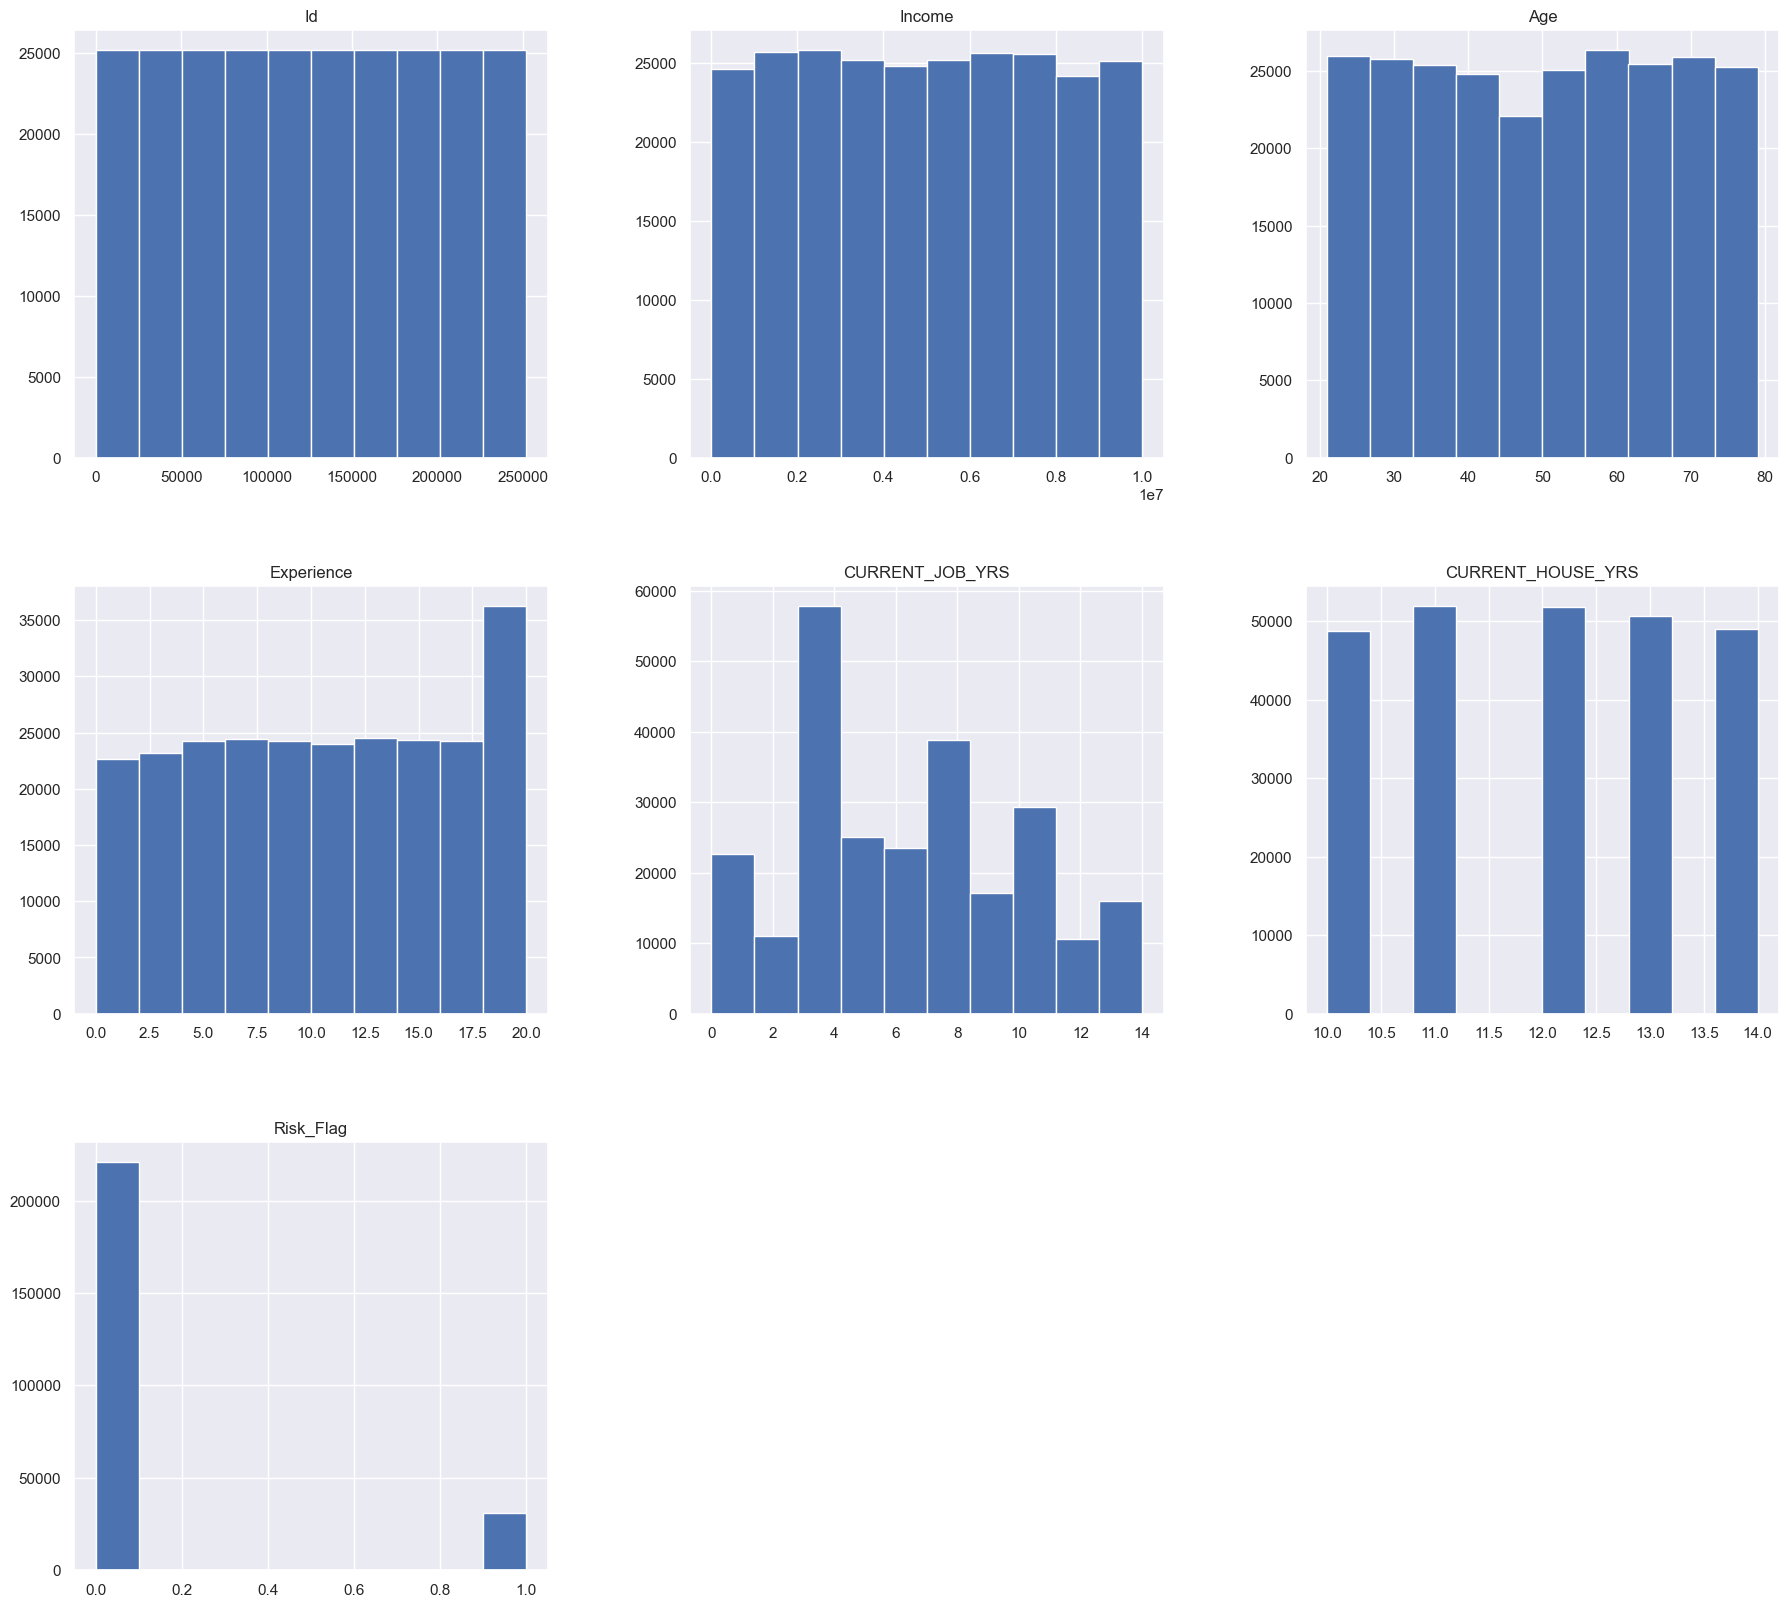

In [17]:
data.hist( figsize = (22, 20) )
plt.show()

In [18]:
data["Risk_Flag"].value_counts()

0    221004
1     30996
Name: Risk_Flag, dtype: int64

C:\Users\HARSHA\AppData\Local\Temp\ipykernel_2136\3460937980.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


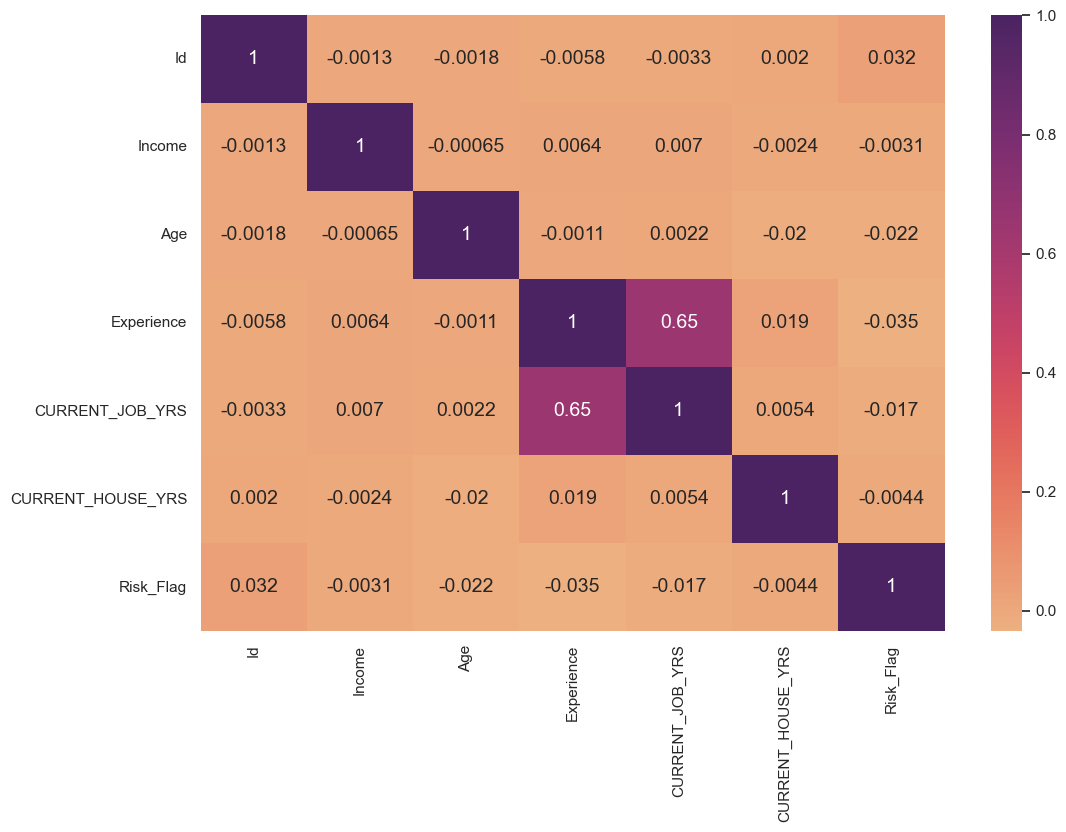

In [19]:
fig, ax = plt.subplots( figsize = (12,8) )

corr_matrix = data.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare", annot=True, ax=ax, annot_kws={"size": 14})

plt.show()

In [20]:
def categorical_valcount_hist(feature):
    print(data[feature].value_counts())
    fig, ax = plt.subplots( figsize = (6,6) )
    sns.countplot(x=feature, ax=ax, data=data)
    plt.show()

single     226272
married     25728
Name: Married/Single, dtype: int64


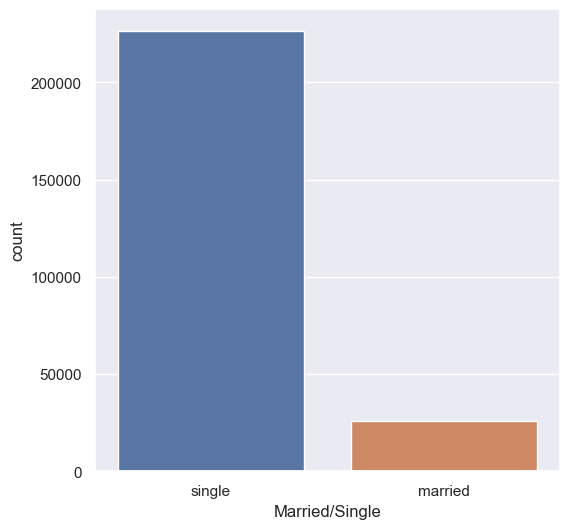

In [21]:
categorical_valcount_hist("Married/Single")

rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64


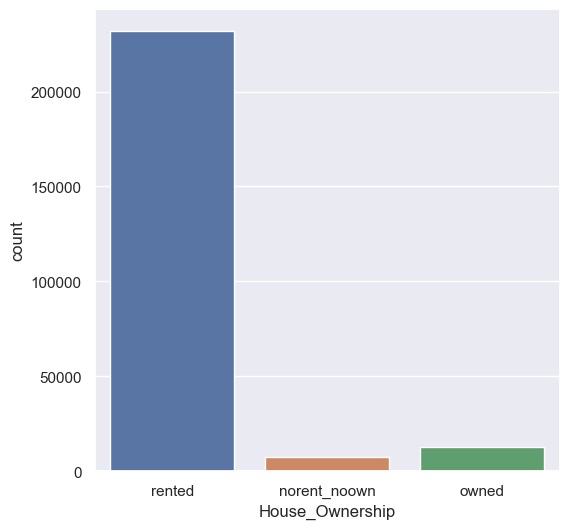

In [22]:
categorical_valcount_hist("House_Ownership")

In [23]:
print( "Total categories in STATE:", len( data["STATE"].unique() ) )
print()
print( data["STATE"].value_counts() )

Total categories in STATE: 29

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64


In [24]:
print( "Total categories in Profession:", len( data["Profession"].unique() ) )
print()
data["Profession"].value_counts()

Total categories in Profession: 51



Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


<Axes: xlabel='Risk_Flag', ylabel='Income'>

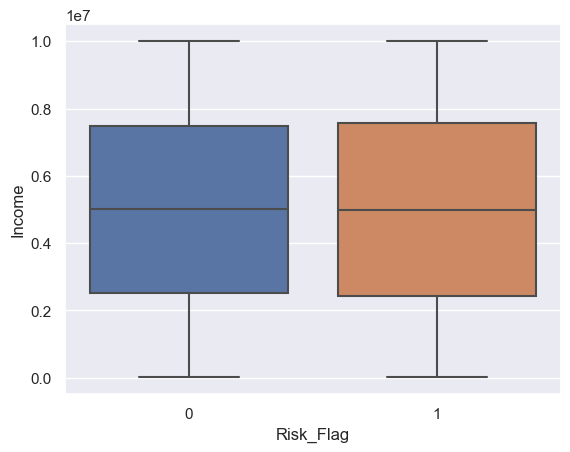

In [26]:
sns.boxplot(x ="Risk_Flag",y="Income" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='Age'>

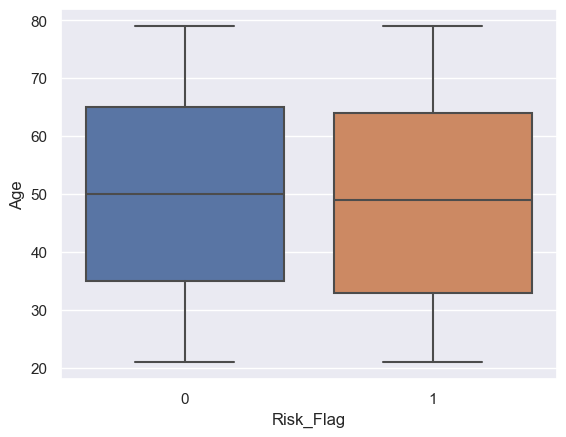

In [27]:
sns.boxplot(x ="Risk_Flag",y="Age" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='Experience'>

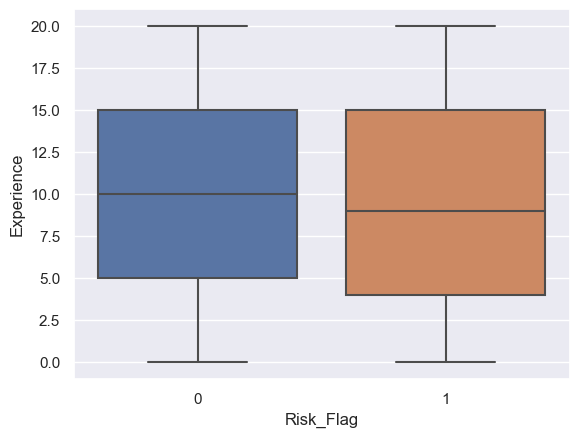

In [28]:
sns.boxplot(x ="Risk_Flag",y="Experience" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

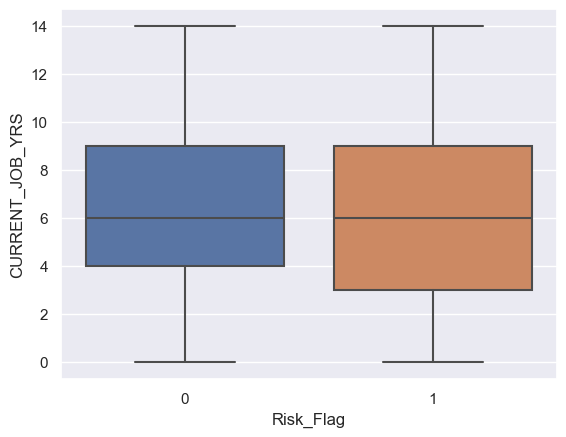

In [29]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_JOB_YRS" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

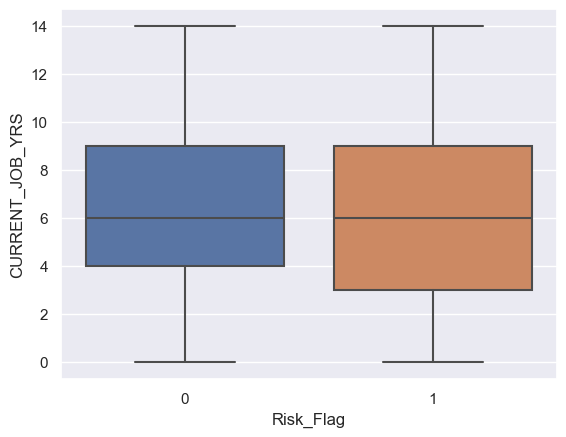

In [30]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_JOB_YRS" ,data = data)

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_HOUSE_YRS'>

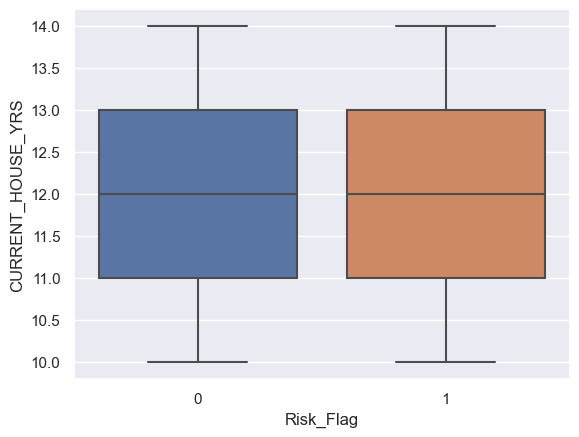

In [31]:
sns.boxplot(x ="Risk_Flag",y="CURRENT_HOUSE_YRS" ,data = data)

<Axes: xlabel='House_Ownership', ylabel='count'>

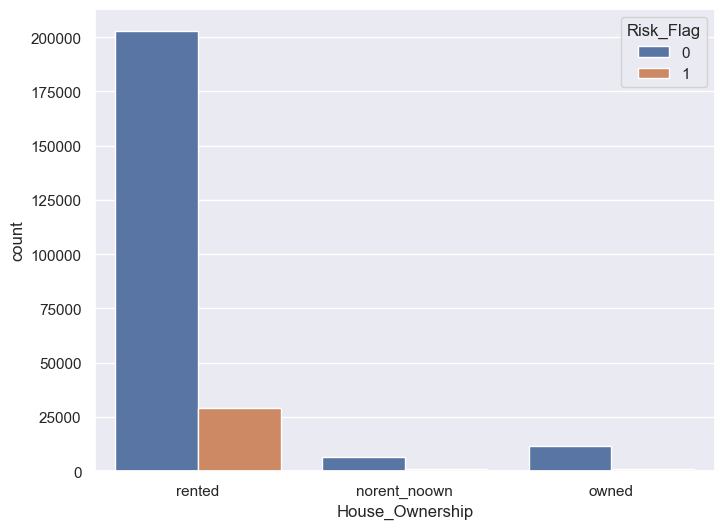

In [32]:
fig, ax = plt.subplots( figsize = (8, 6) )
sns.countplot(x='House_Ownership', hue='Risk_Flag', ax=ax, data=data)

<Axes: xlabel='Car_Ownership', ylabel='count'>

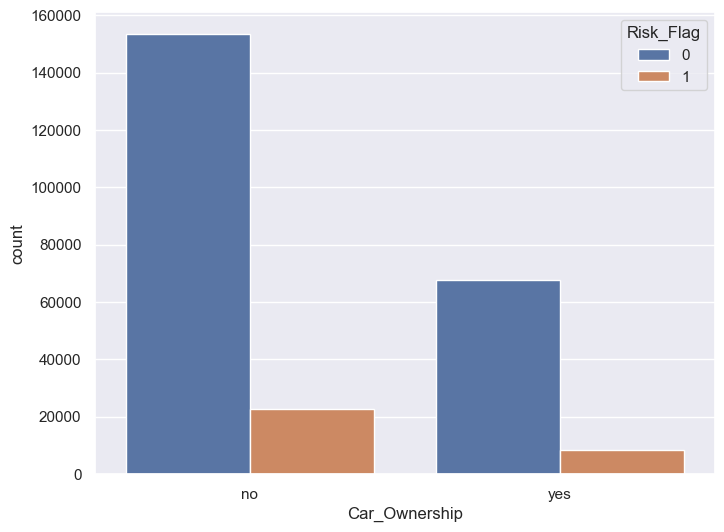

In [33]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot(x='Car_Ownership', hue='Risk_Flag', ax=ax, data=data)

<Axes: xlabel='Married/Single', ylabel='count'>

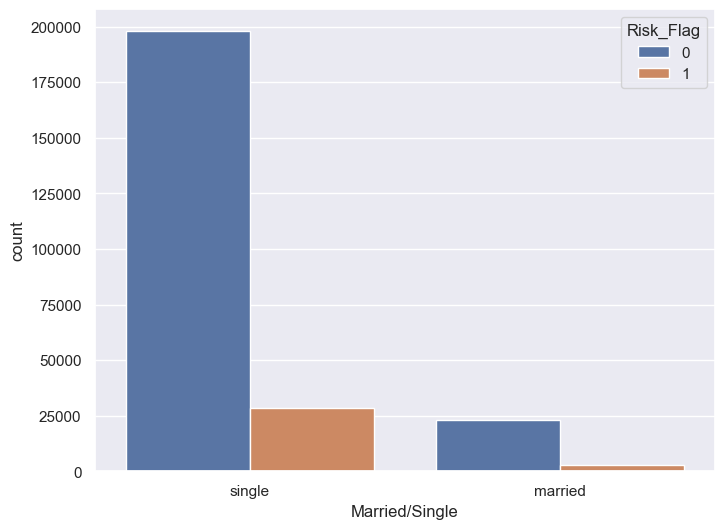

In [34]:
fig, ax = plt.subplots( figsize = (8,6) )
sns.countplot( x='Married/Single', hue='Risk_Flag', data=data )

<Axes: xlabel='Risk_Flag', ylabel='CURRENT_JOB_YRS'>

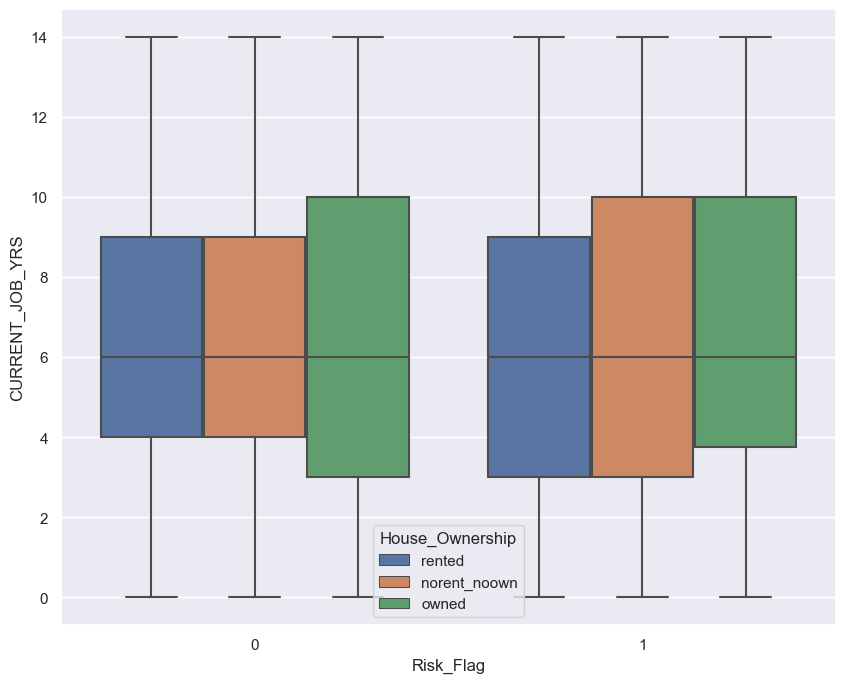

In [35]:
fig, ax = plt.subplots( figsize = (10,8) )
sns.boxplot(x = "Risk_Flag", y = "CURRENT_JOB_YRS", hue='House_Ownership', data = data)

In [ ]:
# Feature Engineering

In [36]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [38]:
label_encoder = LabelEncoder()

for col in ['Married/Single','Car_Ownership']:
    data[col] = label_encoder.fit_transform( data[col] )

In [39]:
onehot_encoder = OneHotEncoder(sparse = False)
data['House_Ownership'] = onehot_encoder.fit_transform(data['House_Ownership'].values.reshape(-1, 1) )

C:\Users\HARSHA\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [40]:
high_card_features = ['Profession', 'CITY', 'STATE']

count_encoder = ce.CountEncoder()

# Transform the features, rename the columns with the _count suffix, and join to dataframe
count_encoded = count_encoder.fit_transform( data[high_card_features] )
data = data.join(count_encoded.add_suffix("_count"))

In [41]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_count,CITY_count,STATE_count
0,1,1303834,23,3,1,0.0,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0,5217,798,14122
1,2,7574516,40,10,1,0.0,0,Software_Developer,Parbhani,Maharashtra,9,13,0,5053,849,25562
2,3,3991815,66,4,0,0.0,0,Technical_writer,Alappuzha,Kerala,4,10,0,5195,688,5805
3,4,6256451,41,2,1,0.0,1,Software_Developer,Bhubaneswar,Odisha,2,12,1,5053,607,4658
4,5,5768871,47,11,1,0.0,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1,4413,809,16537


In [42]:
data= data.drop(labels=['Profession', 'CITY', 'STATE'], axis=1)

In [43]:
data.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Profession_count,CITY_count,STATE_count
0,1,1303834,23,3,1,0.0,0,3,13,0,5217,798,14122
1,2,7574516,40,10,1,0.0,0,9,13,0,5053,849,25562
2,3,3991815,66,4,0,0.0,0,4,10,0,5195,688,5805
3,4,6256451,41,2,1,0.0,1,2,12,1,5053,607,4658
4,5,5768871,47,11,1,0.0,0,3,14,1,4413,809,16537


In [ ]:
Splitting the data into train and test splits

In [44]:
x = data.drop("Risk_Flag", axis=1)
y = data["Risk_Flag"]

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 7)

In [46]:
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline


In [48]:
rf_clf = RandomForestClassifier(criterion='gini', bootstrap=True, random_state=100)

smote_sampler = SMOTE(random_state=9)

pipeline = Pipeline(steps = [['smote', smote_sampler],
                             ['classifier', rf_clf]])

pipeline.fit(x_train, y_train)

y_pred = pipeline.predict(x_test)

In [49]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, roc_auc_score

print("-------------------------TEST SCORES-----------------------") 
print(f"Recall: { round(recall_score(y_test, y_pred)*100, 4) }")
print(f"Precision: { round(precision_score(y_test, y_pred)*100, 4) }")
print(f"F1-Score: { round(f1_score(y_test, y_pred)*100, 4) }")
print(f"Accuracy score: { round(accuracy_score(y_test, y_pred)*100, 4) }")
print(f"AUC Score: { round(roc_auc_score(y_test, y_pred)*100, 4) }")

-------------------------TEST SCORES-----------------------
Recall: 53.799
Precision: 54.3071
F1-Score: 54.0519
Accuracy score: 88.75
AUC Score: 73.7254
